# Preamble

First assignment of week2 on [Likelihood](https://www.coursera.org/learn/statistical-inferences/supplement/z65kC/assignment-2-1-likelihoods)

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.insert(0, '/home/src/')
sys.path

['/home/src/',
 '/home/notebooks',
 '/usr/local/lib/python37.zip',
 '/usr/local/lib/python3.7',
 '/usr/local/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [4]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

from statistical_tests import likelihood_ratio
from plots import likelihood_curve_binomial

# Question 1

In [5]:
rv = binom(n=10, p=0.5)
print(f"Probability of observing 8 success out of 10 flips with a fair coin = {rv.pmf(8):.3f}")

Probability of observing 8 success out of 10 flips with a fair coin = 0.044


## Likelihood curve

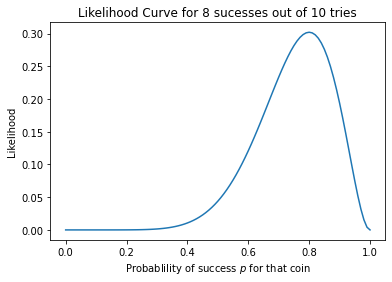

In [6]:
fig, ax = plt.subplots(1, 1)
param, likelihood = likelihood_curve_binomial(nb_tries=10, nb_success=8, ax=ax, normalize=False)

*Probablity vs Likelihood*:
- Probability: parameters of the distribution are fixed, change the data
- Likelihood: Data are fixed, and you vary the parameters of the distribution

"More formally, the likelihood function is the (joint) density function evaluated at the observed data. Likelihood functions can be calculated for many different models (binomial distributions, normal distributions, etc., see Millar, 2011)."
He defines likelihood as $P(\theta, D=D_0)$ where $D_0$ is our specific data. I used to define likelihoods as conditional probabilities, i.e., $P(D=D_0 | \theta)$. However, both definitions coincide if we use a non-informative prior, since $P(\theta, D) = P(D | \theta) P(\theta)$.

# Question 2

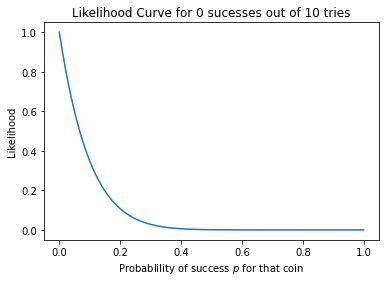

In [7]:
fig, ax = plt.subplots(1, 1)
_,_ = likelihood_curve_binomial(nb_tries=10, nb_success=0, ax=ax, normalize=False)

## Product of likelihood

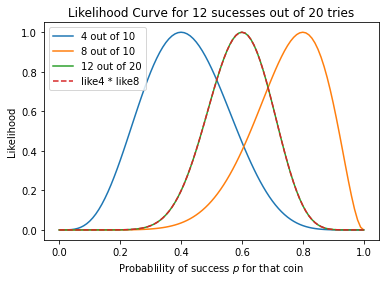

In [8]:
fig, ax = plt.subplots(1, 1)
param, likelihood4 = likelihood_curve_binomial(nb_tries=10, nb_success=4, ax=ax, label='4 out of 10')
_, likelihood8 = likelihood_curve_binomial(nb_tries=10, nb_success=8, ax=ax, label='8 out of 10')
_,_ = likelihood_curve_binomial(nb_tries=20, nb_success=12, ax=ax, label='12 out of 20')
prod = likelihood4*likelihood8
prod_normalized = prod / np.max(prod)
ax.plot(param,prod_normalized, '--', label='like4 * like8')
plt.legend();

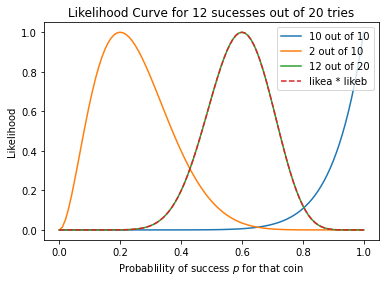

In [9]:
fig, ax = plt.subplots(1, 1)
param, likelihooda = likelihood_curve_binomial(nb_tries=10, nb_success=10, ax=ax, label='10 out of 10')
_, likelihoodb = likelihood_curve_binomial(nb_tries=10, nb_success=2, ax=ax, label='2 out of 10')
_,_ = likelihood_curve_binomial(nb_tries=20, nb_success=12, ax=ax, label='12 out of 20')
prod = likelihooda*likelihoodb
prod_normalized = prod / np.max(prod)
ax.plot(param,prod_normalized, '--', label='likea * likeb')
plt.legend();

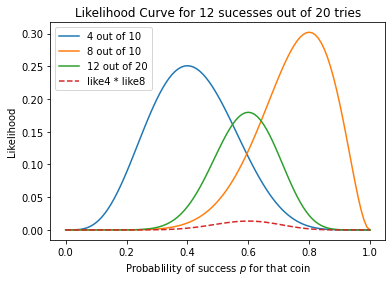

In [10]:
fig, ax = plt.subplots(1, 1)
param, likelihood4 = likelihood_curve_binomial(nb_tries=10, nb_success=4, ax=ax, label='4 out of 10', normalize=False)
_, likelihood8 = likelihood_curve_binomial(nb_tries=10, nb_success=8, ax=ax, label='8 out of 10', normalize=False)
_,_ = likelihood_curve_binomial(nb_tries=20, nb_success=12, ax=ax, label='12 out of 20', normalize=False)
prod = likelihood4*likelihood8
ax.plot(param,prod, '--', label='like4 * like8')
plt.legend();

The products only coincide in the normalized form, as then the likelihood only depends on the powers of $\theta$ and of course $\theta^n = \theta^{n-k} \theta^k$. But in the un-normalized form, the binomial factor changes the shapes.

## Increasing number of flips

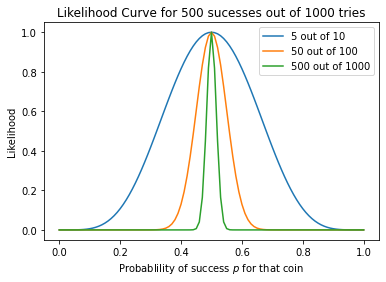

In [11]:
fig, ax = plt.subplots(1, 1)
_,_ = likelihood_curve_binomial(nb_tries=10, nb_success=5, ax=ax, label='5 out of 10')
_,_ = likelihood_curve_binomial(nb_tries=100, nb_success=50, ax=ax, label='50 out of 100')
_,_ = likelihood_curve_binomial(nb_tries=1000, nb_success=500, ax=ax, label='500 out of 1000')
plt.legend();

## Likelihood ratio

Likelihood ratio of L(0.8)/L(0.5) = 6.87
Likelihood ratio of L(0.5)/L(0.8) = 37.25


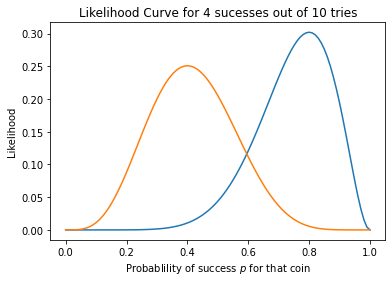

In [12]:
fig, ax = plt.subplots(1, 1);
param, likelihood = likelihood_curve_binomial(nb_tries=10, nb_success=8, ax=ax, normalize=False)
print(f"Likelihood ratio of L(0.8)/L(0.5) = {likelihood_ratio(param, likelihood, param1=0.8, param2=0.5):.2f}")
param, likelihood = likelihood_curve_binomial(nb_tries=10, nb_success=4, ax=ax, normalize=False)
print(f"Likelihood ratio of L(0.5)/L(0.8) = {likelihood_ratio(param, likelihood, param1=0.5, param2=0.8):.2f}")

# Question 3

# Question 4

Likelihood ratio of L(0.4)/L(0.5) = 0.82


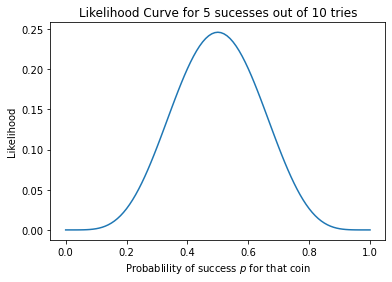

In [13]:
fig, ax = plt.subplots(1, 1);
param, likelihood = likelihood_curve_binomial(nb_tries=10, nb_success=5, ax=ax, normalize=False)
print(f"Likelihood ratio of L(0.4)/L(0.5) = {likelihood_ratio(param, likelihood, param1=0.4, param2=0.5):.2f}")

# Question 5

Likelihood ratio of L(0.4)/L(0.5) = 0.13
Likelihood ratio of L(0.3)/L(0.8) = 803462.49


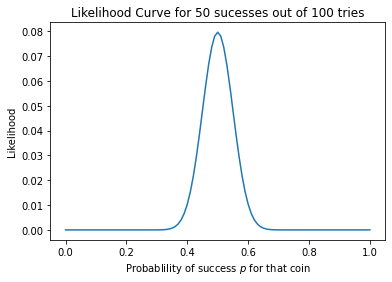

In [14]:
fig, ax = plt.subplots(1, 1);
param, likelihood = likelihood_curve_binomial(nb_tries=100, nb_success=50, ax=ax, normalize=False)
print(f"Likelihood ratio of L(0.4)/L(0.5) = {likelihood_ratio(param, likelihood, param1=0.4, param2=0.5):.2f}")
print(f"Likelihood ratio of L(0.3)/L(0.8) = {likelihood_ratio(param, likelihood, param1=0.3, param2=0.8):.2f}")

# Question 6

Likelihood ratio of L(0.4)/L(0.5) = 0.00


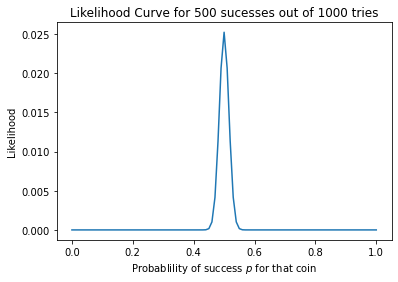

In [15]:
fig, ax = plt.subplots(1, 1);
param, likelihood = likelihood_curve_binomial(nb_tries=1000, nb_success=500, ax=ax, normalize=False)
print(f"Likelihood ratio of L(0.4)/L(0.5) = {likelihood_ratio(param, likelihood, param1=0.4, param2=0.5):.2f}")

# Question 7

# Likelihoods of sets of studies

Likelihood ratio of L(0.8)/L(0.05) = 0.01
Likelihood ratio of L(0.8)/L(0.05) = 0.71
Likelihood ratio of L(0.8)/L(0.05) = 53.89
Likelihood ratio of L(0.8)/L(0.05) = 4096.00


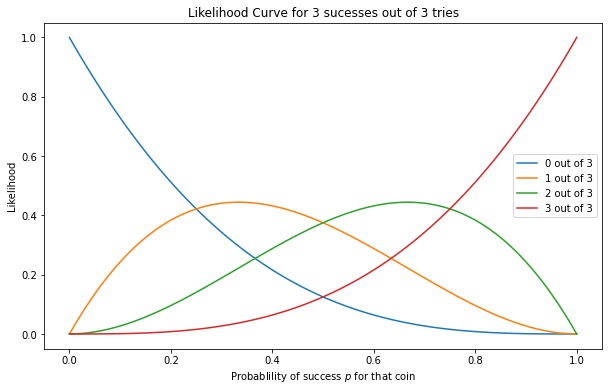

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,6));
for success in range(4):
    param, likelihood = likelihood_curve_binomial(nb_tries=3, nb_success=success, ax=ax, normalize=False, label=f'{success} out of 3')
    print(f"Likelihood ratio of L(0.8)/L(0.05) = {likelihood_ratio(param, likelihood, param1=0.8, param2=0.05):.2f}")
plt.legend()